In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ibm_data.csv')
df.head(3)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900


In [3]:
df.shape

(1048573, 19)

In [4]:
df.isnull().sum()

Unnamed: 0                          0
ctry_name                           0
intgrtd_mngmt_name                  0
intgrtd_operating_team_name         0
city                            46586
st                              45445
sec_lvl_domn                   319457
device_type                    842041
operating_sys                    1820
ip_addr                             0
user_agent                          6
VISIT                               0
ENGD_VISIT                          0
VIEWS                               0
page_url                            1
wk                                  0
mth                                 0
yr                                  0
page_vw_ts                       2743
dtype: int64

## Understanding the features

#### 1. **User agent** - 
The User-Agent request header is a characteristic string that lets servers and network peers identify the application, operating system, vendor, and/or version of the requesting user agent.
    
   **Syntax -** 
    
    User-Agent: <product> / <product-version> <comment>
    
   **Common format for browsers -**
   
    User-Agent: Mozilla/5.0 (<system-information>) <platform> (<platform-details>) <extensions>
    
   **Directives -** 
    
    <product> - A product identifier — its name or development codename.
    <product-version> - Version number of the product.
    <comment> - Zero or more comments containing more details; sub-product information
    
[Source](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers/User-Agent)

In [5]:
df.loc[0, 'user_agent']

'MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE MAC OS X) APPLEWEBKIT/605.1.15 (KHTML  LIKE GECKO) VERSION/12.0 MOBILE/15E148 SAFARI/604.1'

##### Replace missing `user_agent` with `unknown_user_agent`

In [6]:
df['user_agent'].fillna('unknown_user_agent', inplace=True)

In [7]:
df['user_agent'].isnull().sum()

0

##### Dropping missing `page_vw_ts`

In [8]:
df['page_vw_ts'].dropna(inplace=True)

In [9]:
df['page_vw_ts'].isnull().sum()

0

In [10]:
df.shape

(1048573, 19)

In [11]:
df.dtypes

Unnamed: 0                      int64
ctry_name                      object
intgrtd_mngmt_name             object
intgrtd_operating_team_name    object
city                           object
st                             object
sec_lvl_domn                   object
device_type                    object
operating_sys                  object
ip_addr                        object
user_agent                     object
VISIT                           int64
ENGD_VISIT                      int64
VIEWS                           int64
page_url                       object
wk                              int64
mth                             int64
yr                              int64
page_vw_ts                     object
dtype: object

In [12]:
df.sample(3)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
670343,670343,United Kingdom,UKI,Europe,EDINBURGH,EDINBURGH,ED.AC.UK,NaN,MICROSOFT_WINDOWS10,a9880548d575b31b25271f69f0b73bcfdf787158ade8db...,MOZILLA/5.0 (WINDOWS NT 10.0; WOW64; RV:52.0) ...,1,1,2,www.ibm.com/uk-en/analytics/cplex-optimizer,11,3,2019,2019-06-04 19:56:37.008000
677446,677446,United States,United States,North America,MARIETTA,GEORGIA,COMCASTBUSINESS.NET,MOBILEPHONE,ANDROID_8.1.0,777a4d7f8eb21af399302d1e51cde6a10a89fb1f787ec4...,MOZILLA/5.0 (LINUX; ANDROID 8.1.0; LM-X212(G))...,1,0,1,www.ibm.com/us-en/marketplace/micromedex-red-book,11,3,2019,2019-06-04 17:22:17.058000
885569,885569,China,Greater China,Greater China Group,JINAN,SHANDONG,NaN,NaN,MICROSOFT_WINDOWS7,5e4d00c86392ca18cba491726970f5844a2b72db4b7cb3...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,1,2,www-01.ibm.com/marketing/iwm/dldirector/instal...,11,3,2019,2019-06-04 10:14:49.004600


##### `device_type`, `sec_lvl_domn`  have too many nulls and also it won't be useful so dropping that column

In [13]:
df.drop(['device_type', 'sec_lvl_domn'], axis=1, inplace=True)

In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
data = df.copy()

In [16]:
data['date'] = pd.to_datetime(data['page_vw_ts'])
del data['page_vw_ts']

In [17]:
data.head(3)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,date
0,United States,United States,North America,SLIDELL,LOUISIANA,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100
1,Japan,Japan,Japan,TOKYO,TOKYO,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300
2,United States,United States,North America,ELK GROVE,CALIFORNIA,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900


In [18]:
data.nunique()

ctry_name                          220
intgrtd_mngmt_name                  21
intgrtd_operating_team_name          8
city                             20642
st                                1856
operating_sys                      174
ip_addr                         450602
user_agent                       39714
VISIT                              129
ENGD_VISIT                          73
VIEWS                              183
page_url                        329691
wk                                   1
mth                                  1
yr                                   1
date                           1038808
dtype: int64

In [19]:
data.set_index(['date'], inplace=True)

In [20]:
data.head(3)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr
date,,,,,,,,,,,,,,,
2019-06-04 05:05:18.023100,United States,United States,North America,SLIDELL,LOUISIANA,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019
2019-06-04 05:07:11.014300,Japan,Japan,Japan,TOKYO,TOKYO,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019
2019-06-04 05:08:46.081900,United States,United States,North America,ELK GROVE,CALIFORNIA,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019


In [21]:
data.index.year.unique()

Float64Index([2019.0, nan, 2018.0, 2014.0, 2011.0, 2013.0, 2016.0, 2012.0,
              2020.0, 2001.0],
             dtype='float64', name='date')

In [22]:
data.index.year.value_counts(dropna=False)

2019.0    1045785
NaN          2743
2018.0         23
2011.0          9
2016.0          4
2012.0          4
2020.0          2
2014.0          1
2013.0          1
2001.0          1
Name: date, dtype: int64

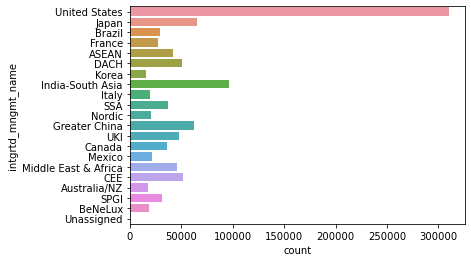

In [23]:
# plt.figure(figsize=(15,8))
sns.countplot(y=data['intgrtd_mngmt_name'])

### Pivot & Pivot table example

In [24]:
from collections import OrderedDict
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1',  '2',  '3',  '4']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = pd.DataFrame(table)
d

,Item,CType,USD,EU
0,Item0,Gold,1,1€
1,Item0,Bronze,2,2€
2,Item0,Gold,3,3€
3,Item1,Silver,4,4€


In [25]:
# p = d.pivot(index='Item', columns='CType', values='USD')

##### We cannot use pivot here as the column `CType` has `Gold` more than once so the function will get confused and will not understand which value of `USD` to put ie `1` or `3`. So we get the error that `ValueError: Index contains duplicate entries, cannot reshape`.
##### So in such as case where we have duplicate values in a column which is used  as a `columns` parameter in `pivot` the we should use `pivot_table` as it allows us to perform aggregation on that duplicate value

In [26]:
d['USD'] = d['USD'].astype('int')
# d['USD'] = d['USD'].astype('int')

In [27]:
d.pivot_table(index='CType', columns='Item', values='USD', aggfunc='sum')

Item,Item0,Item1
CType,,
Bronze,2.0,NaN
Gold,4.0,NaN
Silver,NaN,4.0


#### Visualise number of visits for top 20 countries

In [28]:
country_vists = data.groupby(['ctry_name'])['VISIT'].sum()

In [29]:
country_vists = country_vists.reset_index()

In [30]:
country_vists

,ctry_name,VISIT
0,Afghanistan,84
1,Aland Islands,45
2,Albania,344
3,Algeria,779
4,American Samoa,4
...,...,...
215,"Virgin Islands, British",7
216,"Virgin Islands, U.S.",12
217,Yemen,87
218,Zambia,95


In [31]:
country_vists.sort_values('VISIT', ascending=False, inplace=True)

In [32]:
country_vists.dtypes

ctry_name    object
VISIT         int64
dtype: object

Text(0.5, 1.0, 'Country wise Visits')

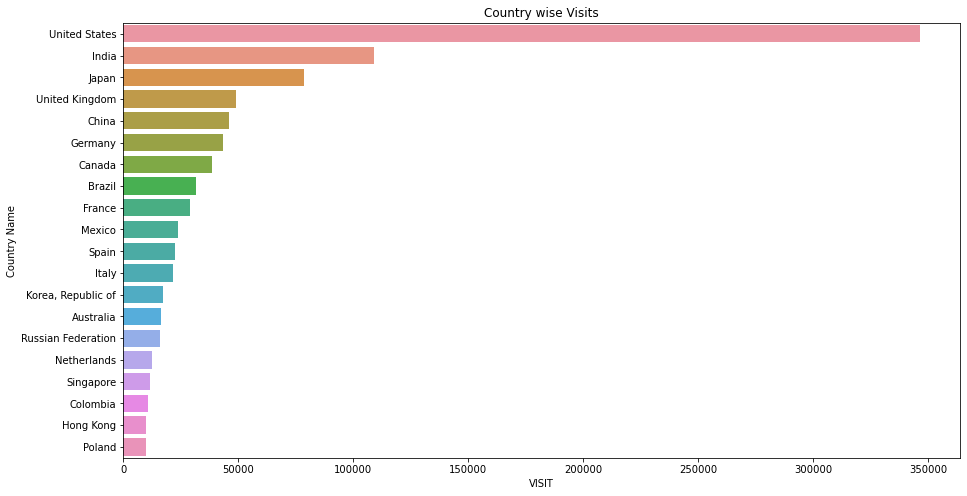

In [33]:
plt.figure(figsize=(15, 8))
sns.barplot(y=country_vists['ctry_name'].head(20), x=country_vists['VISIT'].head(20))
plt.ylabel('Country Name')
plt.title('Country wise Visits')

#### Same plot as above using `dataframe.plot.bar()`

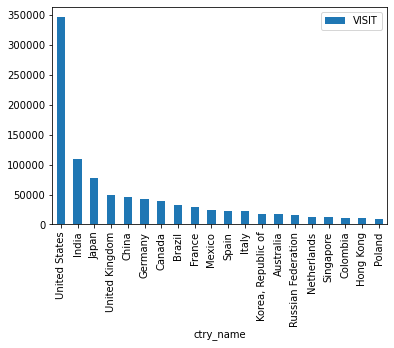

In [34]:
country_vists.head(20).plot.bar(x='ctry_name', y='VISIT')

## Visualize country wise traffic

In [35]:
country_traffic = data.pivot_table(index='ctry_name', values='ip_addr', aggfunc='count')

# country_traffic.sort_values(by='ip_addr', ascending=False, inplace=True)

country_traffic.nlargest(5, 'ip_addr')

,ip_addr
ctry_name,
United States,309576
India,94058
Japan,65142
China,44688
United Kingdom,44255


Text(0.5, 1.0, 'Country wise Traffic')

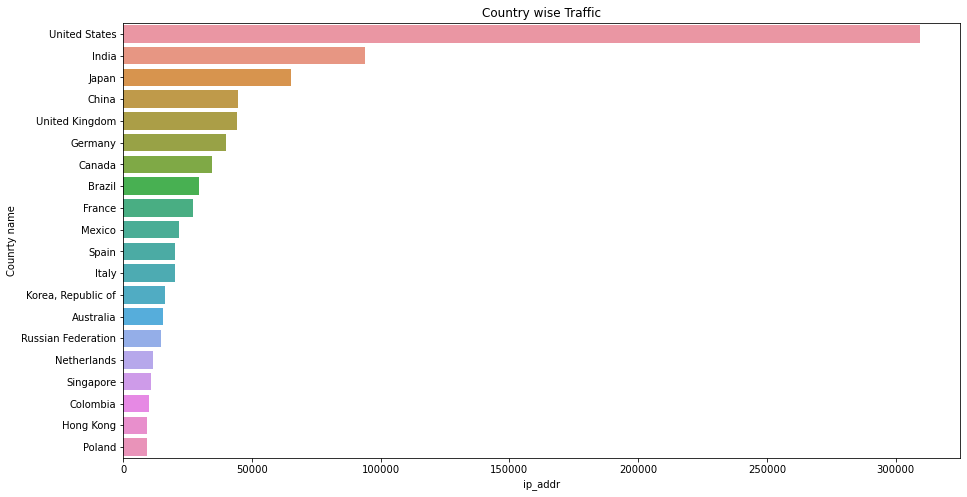

In [36]:
plt.figure(figsize=(15, 8))
sns.barplot(x=country_traffic.nlargest(20, 'ip_addr').ip_addr, y=country_traffic.nlargest(20, 'ip_addr').index)
plt.ylabel('Country name')
plt.title('Country wise Traffic')

[Click to read about Page Views vs Page Visits](https://www.marketing91.com/visits-more-important-than-page-views/)

We will try to focus on those ips from which number of views is greater than a certain threshold

1. Group by IP and sum up the number of views from that IP
2. Save the IP's which have visits greater than threshold
3. Create a new Dataframe which only includes the IP's fetched in step 2

In [63]:
ip_threshold = 24
group1 = data.groupby(['ip_addr'])['VIEWS'].sum()
imp_ips = group1[group1>24].index
new_data = data[data.ip_addr.isin(imp_ips)]
print(f"Number of unique IP's with views greater than {ip_threshold} are - {len(imp_ips)}")

Number of unique IP's with views greater than 24 are - 7867


In [64]:
new_data.shape

(267731, 15)

### Calculating bounce rate 
**Bounce rate** - The number of visitors who leave a website after only visiting the landing page (the page that led them to the website) and not interacting in any way, divided by the total number of visitors to the site.

In [65]:
new_data['bounce rate'] = (new_data.VISIT - new_data.ENGD_VISIT) / new_data.VISIT

c:\users\bonsai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
new_data.isnull().sum()

ctry_name                          0
intgrtd_mngmt_name                 0
intgrtd_operating_team_name        0
city                           32852
st                             32610
operating_sys                    384
ip_addr                            0
user_agent                         0
VISIT                              0
ENGD_VISIT                         0
VIEWS                              0
page_url                           0
wk                                 0
mth                                0
yr                                 0
bounce rate                        0
dtype: int64

In [67]:
cols_to_drop = ['st', 'city', 'wk', 'mth', 'yr']
new_data.drop(columns=cols_to_drop, axis=1, inplace=True)

c:\users\bonsai\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
new_data.columns

Index(['ctry_name', 'intgrtd_mngmt_name', 'intgrtd_operating_team_name',
       'operating_sys', 'ip_addr', 'user_agent', 'VISIT', 'ENGD_VISIT',
       'VIEWS', 'page_url', 'bounce rate'],
      dtype='object')

In [69]:
new_data['operating_sys'].fillna('unknown OS', inplace=True)
new_data.isnull().sum()

c:\users\bonsai\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


ctry_name                      0
intgrtd_mngmt_name             0
intgrtd_operating_team_name    0
operating_sys                  0
ip_addr                        0
user_agent                     0
VISIT                          0
ENGD_VISIT                     0
VIEWS                          0
page_url                       0
bounce rate                    0
dtype: int64

In [70]:
unique_ip_info = new_data.loc[new_data.ip_addr == imp_ips[0], 'ctry_name':'ip_addr'].head(1)

In [71]:
unique_ip_info

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,operating_sys,ip_addr
date,,,,,
2019-06-04 00:57:11.016300,India,India-South Asia,Asia Pacific,MICROSOFT_WINDOWS7,00099b9633602eacab5e5dbe6f33bef809352883993334...


### We want to create a dataframe which has a column of unique IP's, average bounce rate for that IP, Sum of Views in each hour (0-23), sum of Views, average of views

In [217]:
# Bounce rate, calculating median of bounce rate for each IP
views_median = new_data.groupby(['ip_addr', 'ctry_name', 'intgrtd_mngmt_name', 'intgrtd_operating_team_name'])['bounce rate'].median()
# new_data['ip_addr'].map(views_median)
views_median = views_median.reset_index()
views_median

,ip_addr,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,bounce rate
0,00099b9633602eacab5e5dbe6f33bef809352883993334...,India,India-South Asia,Asia Pacific,1.000000
1,000d50d7fbc4b11d4fb9a5f59e833752e07dc0e441f8e3...,Morocco,Middle East & Africa,Middle East & Africa,0.166667
2,00111924a31e3ebe6e48de9012da36bd94f67e36bc44fe...,Japan,Japan,Japan,1.000000
3,0024c93d4f7920993f54b8ef5eb49ed935dc7c20043206...,United States,United States,North America,1.000000
4,0026012476ea987cb51641e1814a7e0ce02dd833e8daf9...,United States,United States,North America,0.000000
...,...,...,...,...,...
7862,ffd6229d722dc56cca6ec6076547c99e38c353a850c103...,Egypt,Middle East & Africa,Middle East & Africa,0.000000
7863,ffdb32ddad56848bcb984c14729a04bc3993a1e04a9ba2...,United States,United States,North America,1.000000
7864,ffdb5b94e4d05cb90428f42aa7a1f91d0262e37e5f1b49...,Gabon,Middle East & Africa,Middle East & Africa,0.000000
7865,fff85f82ae2e7048276fc32f42e86b4d3002a38e8ad206...,Germany,DACH,Europe,1.000000


In [218]:
# Calculate views for each IP for each hour (0-23)
hours = pd.DataFrame(columns=np.arange(24))

In [219]:
per_hour = new_data.pivot_table(index='ip_addr', columns=new_data.index.hour, values='VIEWS', aggfunc='sum')

per_hour.columns.name = None

per_hour

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
ip_addr,,,,,,,,,,,,,,,,,,,,,
00099b9633602eacab5e5dbe6f33bef809352883993334b9330266cb8d546fc1,3.0,6.0,4.0,2.0,4.0,8.0,3.0,7.0,9.0,6.0,...,10.0,6.0,5.0,5.0,3.0,6.0,9.0,9.0,9.0,3.0
000d50d7fbc4b11d4fb9a5f59e833752e07dc0e441f8e3e37277122fb85ebdc5,30.0,11.0,NaN,1.0,13.0,NaN,5.0,NaN,NaN,5.0,...,NaN,3.0,5.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN
00111924a31e3ebe6e48de9012da36bd94f67e36bc44fe9801056b10aee06ed1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN
0024c93d4f7920993f54b8ef5eb49ed935dc7c2004320651250de361d82777ef,NaN,3.0,NaN,9.0,NaN,2.0,3.0,1.0,2.0,3.0,...,5.0,2.0,3.0,6.0,NaN,2.0,1.0,NaN,1.0,1.0
0026012476ea987cb51641e1814a7e0ce02dd833e8daf9cbf946548e1679639a,NaN,3.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,...,NaN,1.0,1.0,4.0,1.0,1.0,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd6229d722dc56cca6ec6076547c99e38c353a850c1034e275b752b2e76f5d0,NaN,1.0,2.0,NaN,3.0,NaN,2.0,3.0,1.0,2.0,...,2.0,2.0,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN
ffdb32ddad56848bcb984c14729a04bc3993a1e04a9ba2e2a75c00275bfb9ab7,1.0,8.0,2.0,2.0,3.0,4.0,4.0,3.0,5.0,17.0,...,13.0,6.0,3.0,2.0,8.0,6.0,6.0,3.0,3.0,5.0
ffdb5b94e4d05cb90428f42aa7a1f91d0262e37e5f1b4910ecf2e95b3154a0a0,3.0,1.0,NaN,NaN,NaN,NaN,7.0,3.0,NaN,2.0,...,6.0,3.0,NaN,1.0,NaN,NaN,3.0,NaN,2.0,NaN


In [222]:
per_hour.columns = [str(i)+'_hour' for i in range(24)]
per_hour.fillna(0, inplace=True)
per_hour

,0_hour,1_hour,2_hour,3_hour,4_hour,5_hour,6_hour,7_hour,8_hour,9_hour,...,14_hour,15_hour,16_hour,17_hour,18_hour,19_hour,20_hour,21_hour,22_hour,23_hour
ip_addr,,,,,,,,,,,,,,,,,,,,,
00099b9633602eacab5e5dbe6f33bef809352883993334b9330266cb8d546fc1,3.0,6.0,4.0,2.0,4.0,8.0,3.0,7.0,9.0,6.0,...,10.0,6.0,5.0,5.0,3.0,6.0,9.0,9.0,9.0,3.0
000d50d7fbc4b11d4fb9a5f59e833752e07dc0e441f8e3e37277122fb85ebdc5,30.0,11.0,0.0,1.0,13.0,0.0,5.0,0.0,0.0,5.0,...,0.0,3.0,5.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0
00111924a31e3ebe6e48de9012da36bd94f67e36bc44fe9801056b10aee06ed1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0
0024c93d4f7920993f54b8ef5eb49ed935dc7c2004320651250de361d82777ef,0.0,3.0,0.0,9.0,0.0,2.0,3.0,1.0,2.0,3.0,...,5.0,2.0,3.0,6.0,0.0,2.0,1.0,0.0,1.0,1.0
0026012476ea987cb51641e1814a7e0ce02dd833e8daf9cbf946548e1679639a,0.0,3.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,...,0.0,1.0,1.0,4.0,1.0,1.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd6229d722dc56cca6ec6076547c99e38c353a850c1034e275b752b2e76f5d0,0.0,1.0,2.0,0.0,3.0,0.0,2.0,3.0,1.0,2.0,...,2.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0
ffdb32ddad56848bcb984c14729a04bc3993a1e04a9ba2e2a75c00275bfb9ab7,1.0,8.0,2.0,2.0,3.0,4.0,4.0,3.0,5.0,17.0,...,13.0,6.0,3.0,2.0,8.0,6.0,6.0,3.0,3.0,5.0
ffdb5b94e4d05cb90428f42aa7a1f91d0262e37e5f1b4910ecf2e95b3154a0a0,3.0,1.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,2.0,...,6.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0


In [223]:
# Calculate average visits and sum of visits per IP
hour_sum = pd.DataFrame(per_hour.sum(axis=1), columns=['views sum'])
hour_mean = pd.DataFrame(per_hour.mean(axis=1), columns=['views average'])
hour_final = pd.merge(hour_sum, hour_mean, left_on=hour_sum.index, right_on=hour_mean.index, )
hour_final

,key_0,views sum,views average
0,00099b9633602eacab5e5dbe6f33bef809352883993334...,143.0,5.958333
1,000d50d7fbc4b11d4fb9a5f59e833752e07dc0e441f8e3...,127.0,5.291667
2,00111924a31e3ebe6e48de9012da36bd94f67e36bc44fe...,111.0,4.625000
3,0024c93d4f7920993f54b8ef5eb49ed935dc7c20043206...,55.0,2.291667
4,0026012476ea987cb51641e1814a7e0ce02dd833e8daf9...,27.0,1.125000
...,...,...,...
7862,ffd6229d722dc56cca6ec6076547c99e38c353a850c103...,29.0,1.208333
7863,ffdb32ddad56848bcb984c14729a04bc3993a1e04a9ba2...,138.0,5.750000
7864,ffdb5b94e4d05cb90428f42aa7a1f91d0262e37e5f1b49...,35.0,1.458333
7865,fff85f82ae2e7048276fc32f42e86b4d3002a38e8ad206...,202.0,8.416667


In [226]:
ip_data = pd.merge(views_median, per_hour, left_on=views_median.ip_addr, right_on=per_hour.index)

ip_data = pd.merge(ip_data, hour_final, left_on=ip_data.index, right_on=hour_final.index)

ip_data.head()

In [227]:
ip_data.drop(columns=['key_0', 'key_0_x', 'key_0_y'], axis=1, inplace=True)

# ip_data.rename(columns={'':'ip_addr'}, inplace=True)

In [228]:
ip_data.head()

,ip_addr,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,bounce rate,0_hour,1_hour,2_hour,3_hour,4_hour,...,16_hour,17_hour,18_hour,19_hour,20_hour,21_hour,22_hour,23_hour,views sum,views average
0,00099b9633602eacab5e5dbe6f33bef809352883993334...,India,India-South Asia,Asia Pacific,1.000000,3.0,6.0,4.0,2.0,4.0,...,5.0,5.0,3.0,6.0,9.0,9.0,9.0,3.0,143.0,5.958333
1,000d50d7fbc4b11d4fb9a5f59e833752e07dc0e441f8e3...,Morocco,Middle East & Africa,Middle East & Africa,0.166667,30.0,11.0,0.0,1.0,13.0,...,5.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,127.0,5.291667
2,00111924a31e3ebe6e48de9012da36bd94f67e36bc44fe...,Japan,Japan,Japan,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,111.0,4.625000
3,0024c93d4f7920993f54b8ef5eb49ed935dc7c20043206...,United States,United States,North America,1.000000,0.0,3.0,0.0,9.0,0.0,...,3.0,6.0,0.0,2.0,1.0,0.0,1.0,1.0,55.0,2.291667
4,0026012476ea987cb51641e1814a7e0ce02dd833e8daf9...,United States,United States,North America,0.000000,0.0,3.0,0.0,0.0,0.0,...,1.0,4.0,1.0,1.0,0.0,4.0,0.0,0.0,27.0,1.125000


In [230]:
ip_data['bounce rate'] = np.round(ip_data['bounce rate'], 2)
ip_data['views average'] = np.round(ip_data['views average'], 2)

ip_data.head()

,ip_addr,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,bounce rate,0_hour,1_hour,2_hour,3_hour,4_hour,...,16_hour,17_hour,18_hour,19_hour,20_hour,21_hour,22_hour,23_hour,views sum,views average
0,00099b9633602eacab5e5dbe6f33bef809352883993334...,India,India-South Asia,Asia Pacific,1.00,3.0,6.0,4.0,2.0,4.0,...,5.0,5.0,3.0,6.0,9.0,9.0,9.0,3.0,143.0,5.96
1,000d50d7fbc4b11d4fb9a5f59e833752e07dc0e441f8e3...,Morocco,Middle East & Africa,Middle East & Africa,0.17,30.0,11.0,0.0,1.0,13.0,...,5.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,127.0,5.29
2,00111924a31e3ebe6e48de9012da36bd94f67e36bc44fe...,Japan,Japan,Japan,1.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,111.0,4.62
3,0024c93d4f7920993f54b8ef5eb49ed935dc7c20043206...,United States,United States,North America,1.00,0.0,3.0,0.0,9.0,0.0,...,3.0,6.0,0.0,2.0,1.0,0.0,1.0,1.0,55.0,2.29
4,0026012476ea987cb51641e1814a7e0ce02dd833e8daf9...,United States,United States,North America,0.00,0.0,3.0,0.0,0.0,0.0,...,1.0,4.0,1.0,1.0,0.0,4.0,0.0,0.0,27.0,1.12
